In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [18]:
def load_class_data(file_path, label):
    """ Load individual class files and assign labels """
    data = np.loadtxt(file_path, delimiter=' ')  # Changed delimiter to space
    labels = np.full((data.shape[0], 1), label)  # Assign label to all samples
    return np.hstack((data, labels))  # Merge features and labels

In [19]:
# Load LS Dataset
ls_class1 = load_class_data("Class1.txt", label=0)
ls_class2 = load_class_data("Class2.txt", label=1)
ls_class3 = load_class_data("Class3.txt", label=2)
ls_data = np.vstack((ls_class1, ls_class2, ls_class3))
X_ls, y_ls = ls_data[:, :-1], ls_data[:, -1].astype(int)

In [20]:
# Normalize Data
scaler_ls = StandardScaler()
X_ls_train, X_ls_test, y_ls_train, y_ls_test = train_test_split(scaler_ls.fit_transform(X_ls), y_ls, test_size=0.3, stratify=y_ls, random_state=42)


#### Plot train data for x train

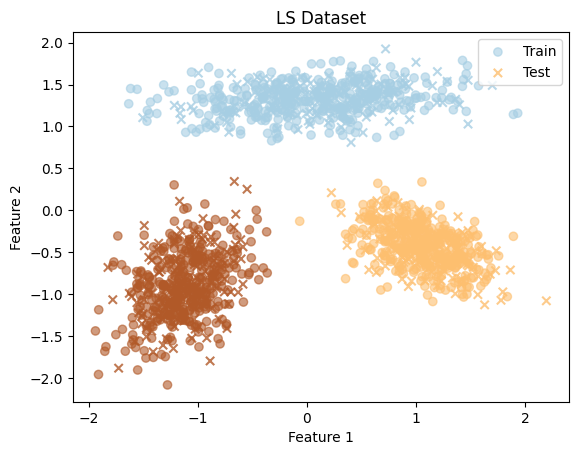

In [21]:
plt.scatter(X_ls_train[:, 0], X_ls_train[:, 1], c=y_ls_train, cmap=plt.cm.Paired, label="Train", marker="o", alpha=0.6)
plt.scatter(X_ls_test[:, 0], X_ls_test[:, 1], c=y_ls_test, cmap=plt.cm.Paired, label="Test", marker="x", alpha=0.8)
plt.title("LS Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [22]:
def sigmoid(x):
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron 1 vs all classification


In [23]:
class Perceptron:
    def __init__(self, input_size, activation='sigmoid', lr=0.01, epochs=1000):
        self.weights = np.random.randn(input_size + 1) * 0.01
        self.activation = sigmoid if activation == 'sigmoid' else step_function
        self.lr = lr
        self.epochs = epochs

    def forward(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Bias term
        return self.activation(np.dot(X, self.weights))

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        errors = []
        for epoch in range(self.epochs):
            y_pred = self.activation(np.dot(X, self.weights))
            error = y - y_pred
            self.weights += self.lr * np.dot(X.T, error) / X.shape[0]  # Batch update
            errors.append(np.mean(np.abs(error)))
        return errors

    def predict(self, X):
        return self.forward(X) >= 0.5

In [24]:
def plot_decision_boundary(model, X, y):
    """ Visualize decision boundaries """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

In [25]:
array_class1_train=[(el>0) for el in y_ls_train]

In [26]:
# Train Perceptron for LS
model_ls_1 = Perceptron(input_size=X_ls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_1 = model_ls_1.train(X_ls_train, array_class1_train)

In [27]:
array_class1_test=[(el>0) for el in y_ls_test]
y_ls_pred = model_ls_1.predict(X_ls_test)
accuracy_ls = accuracy_score(array_class1_test, y_ls_pred)
conf_matrix_ls_1 = confusion_matrix(array_class1_test, y_ls_pred)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_1)

LS Dataset Accuracy: 0.9977777777777778
LS Confusion Matrix:
 [[150   0]
 [  1 299]]


In [28]:
# Train Perceptron for LS
array_class2_train=[(el==1) for el in y_ls_train]
model_ls_2 = Perceptron(input_size=X_ls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_2 = model_ls_2.train(X_ls_train, array_class2_train)
array_class2_test=[(el==1) for el in y_ls_test]
y_ls_pred = model_ls_2.predict(X_ls_test)
accuracy_ls = accuracy_score(array_class2_test, y_ls_pred)
conf_matrix_ls_2 = confusion_matrix(array_class2_test, y_ls_pred)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_2)

LS Dataset Accuracy: 0.9777777777777777
LS Confusion Matrix:
 [[292   8]
 [  2 148]]


In [29]:
# Train Perceptron for LS
array_class3_train=[(el==2) for el in y_ls_train]
model_ls_3 = Perceptron(input_size=X_ls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_3 = model_ls_3.train(X_ls_train, array_class3_train)
array_class3_test=[(el==2) for el in y_ls_test]
y_ls_pred = model_ls_3.predict(X_ls_test)
accuracy_ls = accuracy_score(array_class3_test, y_ls_pred)
conf_matrix_ls_3 = confusion_matrix(array_class3_test, y_ls_pred)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_3)

LS Dataset Accuracy: 0.9933333333333333
LS Confusion Matrix:
 [[299   1]
 [  2 148]]


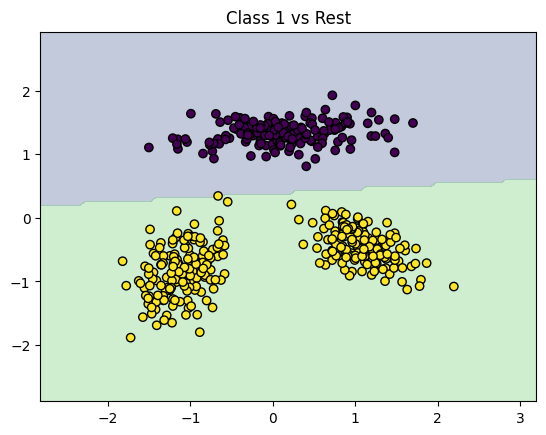

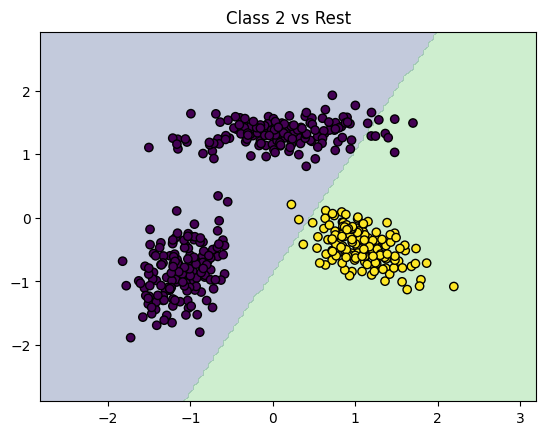

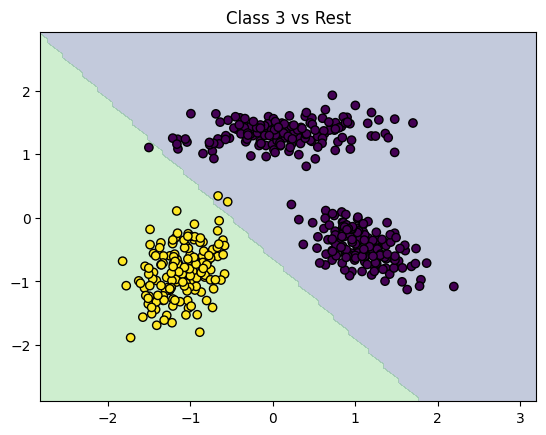

In [30]:
# prompt: plot a combined graph with descision boundaries for the above results

# Assuming X_ls_train and X_ls_test are 2D arrays (features)
# and y_ls_train and y_ls_test are 1D arrays (labels)

# plt.figure(figsize=(12, 6))

# Plot for Class 1 vs rest
plt.title("Class 1 vs Rest")
plot_decision_boundary(model_ls_1, X_ls_test[:,:2], array_class1_test)
plt.show()
# Plot for Class 2 vs rest
# plt.subplot(1, 3, 2)
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 2)
plt.title("Class 2 vs Rest")
plot_decision_boundary(model_ls_2, X_ls_test[:,:2], array_class2_test) # Assuming model_ls is trained for class 2
plt.show()


# Plot for Class 3 vs rest
# plt.subplot(1, 3, 3)
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 3)
plt.title("Class 3 vs Rest")
plot_decision_boundary(model_ls_3, X_ls_test[:, :2], array_class3_test) # Assuming model_ls is trained for class 3

# plt.tight_layout()
plt.show()


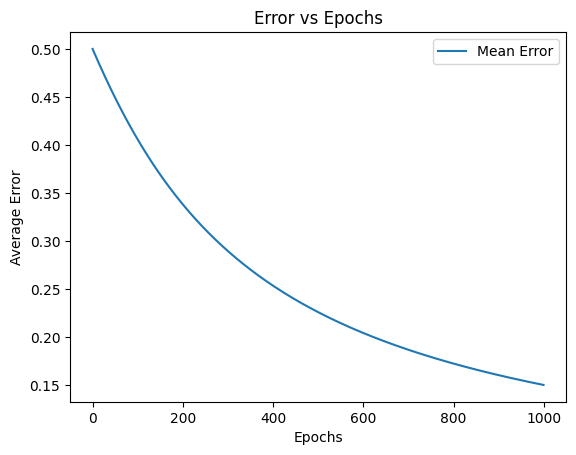

In [31]:
mean_error = (np.array(errors_ls_1) + np.array(errors_ls_2) + np.array(errors_ls_3)) / 3
# print(f"Mean of the errors: {mean_error}")
plt.plot(mean_error, label='Mean Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

# one vs one approach

LS Dataset Accuracy: 0.9966666666666667
LS Confusion Matrix:
 [[149   1]
 [  0 150]]


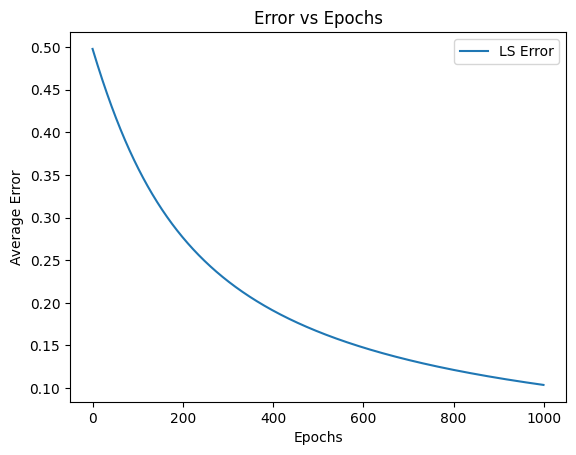

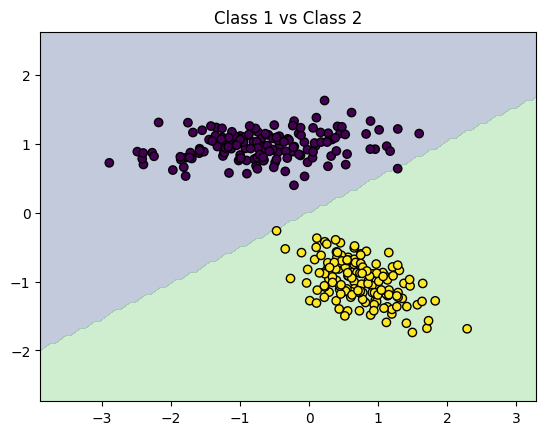

In [32]:
ls_data_1_vs_2 = np.vstack((ls_class1, ls_class2))
X_ls_1_vs_2, y_ls_1_vs_2 = ls_data_1_vs_2[:, :-1], ls_data_1_vs_2[:, -1].astype(int)
X_ls_train_1_vs_2, X_ls_test_1_vs_2, y_ls_train_1_vs_2, y_ls_test_1_vs_2 = train_test_split(scaler_ls.fit_transform(X_ls_1_vs_2), y_ls_1_vs_2, test_size=0.3, stratify=y_ls_1_vs_2, random_state=42)
model_ls_1_vs_2 = Perceptron(input_size=X_ls_train_1_vs_2.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_1_vs_2 = model_ls_1_vs_2.train(X_ls_train_1_vs_2, y_ls_train_1_vs_2)
y_ls_pred_1_vs_2 = model_ls_1_vs_2.predict(X_ls_test_1_vs_2)
accuracy_ls = accuracy_score(y_ls_test_1_vs_2, y_ls_pred_1_vs_2)
conf_matrix_ls_1_vs_2 = confusion_matrix(y_ls_test_1_vs_2, y_ls_pred_1_vs_2)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_1_vs_2)
plt.plot(errors_ls_1_vs_2, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 1 vs Class 2")
plot_decision_boundary(model_ls_1_vs_2,X_ls_test_1_vs_2[:,:2],y_ls_test_1_vs_2) # Assuming model_ls is trained for class 2
plt.show()
# plt.title("Class 2 vs Rest")
plt.show()

LS Dataset Accuracy: 0.9966666666666667
LS Confusion Matrix:
 [[150   0]
 [  1 149]]


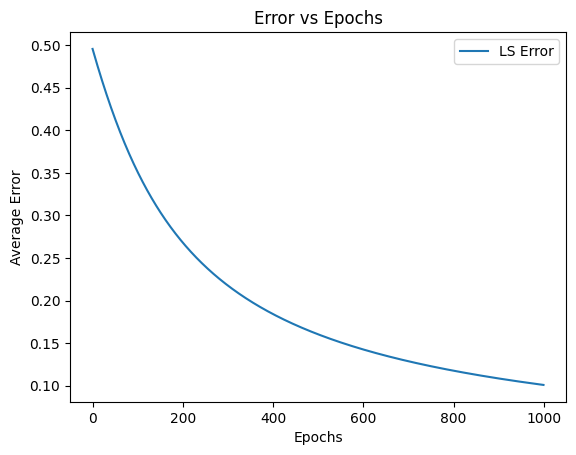

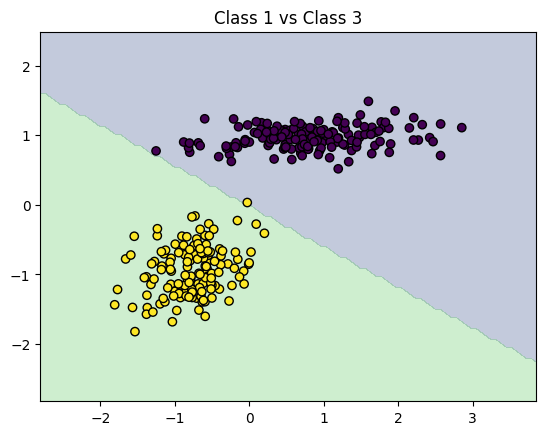

In [33]:
# Load LS Dataset
ls_class3_ = load_class_data("Class3.txt", label=1)
class1_vs_class3 = np.vstack((ls_class1, ls_class3_))
ls_data_1_vs_3 = np.vstack((ls_class1, ls_class3_))
X_ls_1_vs_3, y_ls_1_vs_3 = ls_data_1_vs_3[:, :-1], ls_data_1_vs_3[:, -1].astype(int)
X_ls_train_1_vs_3, X_ls_test_1_vs_3, y_ls_train_1_vs_3, y_ls_test_1_vs_3 = train_test_split(scaler_ls.fit_transform(X_ls_1_vs_3), y_ls_1_vs_3, test_size=0.3, stratify=y_ls_1_vs_3, random_state=42)
model_ls_1_vs_3 = Perceptron(input_size=X_ls_train_1_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_1_vs_3 = model_ls_1_vs_3.train(X_ls_train_1_vs_3, y_ls_train_1_vs_3)
y_ls_pred_1_vs_3 = model_ls_1_vs_3.predict(X_ls_test_1_vs_3)
accuracy_ls = accuracy_score(y_ls_test_1_vs_3, y_ls_pred_1_vs_3)
conf_matrix_ls_1_vs_3 = confusion_matrix(y_ls_test_1_vs_3, y_ls_pred_1_vs_3)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_1_vs_3)
plt.plot(errors_ls_1_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 1 vs Class 3")
plot_decision_boundary(model_ls_1_vs_3, X_ls_test_1_vs_3[:, :2], y_ls_test_1_vs_3) # Assuming model_ls is trained for class 3
plt.show()
# plt.title("Class 3 vs Rest")
plt.show()



LS Dataset Accuracy: 0.9866666666666667
LS Confusion Matrix:
 [[150   0]
 [  4 146]]


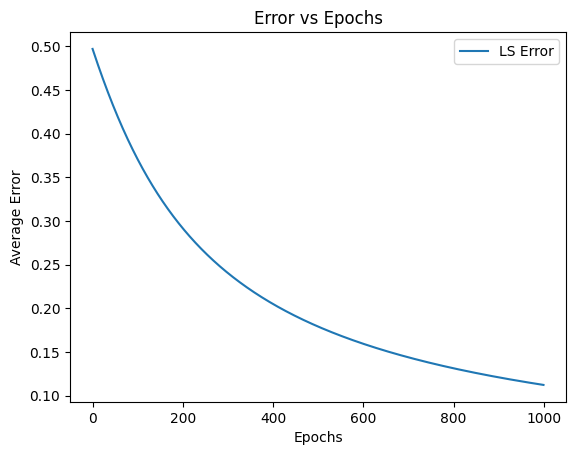

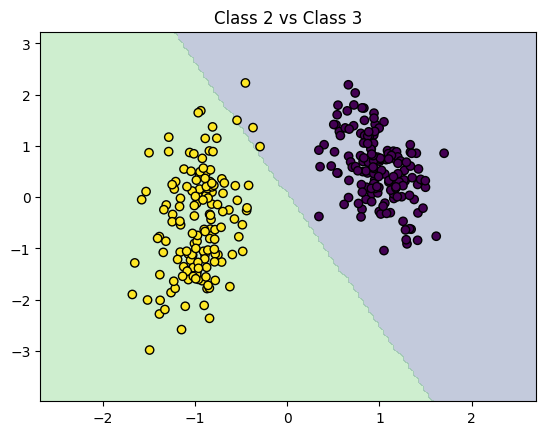

In [34]:
ls_class2_ = load_class_data("Class2.txt", label=0)
# Load LS Dataset
ls_data_2_vs_3 = np.vstack((ls_class2_, ls_class3_))
X_ls_2_vs_3, y_ls_2_vs_3 = ls_data_2_vs_3[:, :-1], ls_data_2_vs_3[:, -1].astype(int)
X_ls_train_2_vs_3, X_ls_test_2_vs_3, y_ls_train_2_vs_3, y_ls_test_2_vs_3 = train_test_split(scaler_ls.fit_transform(X_ls_2_vs_3), y_ls_2_vs_3, test_size=0.3, stratify=y_ls_2_vs_3, random_state=42)
model_ls_2_vs_3 = Perceptron(input_size=X_ls_train_2_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_ls_2_vs_3 = model_ls_2_vs_3.train(X_ls_train_2_vs_3, y_ls_train_2_vs_3)
y_ls_pred_2_vs_3 = model_ls_2_vs_3.predict(X_ls_test_2_vs_3)
accuracy_ls = accuracy_score(y_ls_test_2_vs_3, y_ls_pred_2_vs_3)
conf_matrix_ls_2_vs_3 = confusion_matrix(y_ls_test_2_vs_3, y_ls_pred_2_vs_3)
print("LS Dataset Accuracy:", accuracy_ls)
print("LS Confusion Matrix:\n", conf_matrix_ls_2_vs_3)
plt.plot(errors_ls_2_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 2 vs Class 3")
plot_decision_boundary(model_ls_2_vs_3, X_ls_test_2_vs_3[:, :2], y_ls_test_2_vs_3) # Assuming model_ls is trained for class 3
plt.show()
# plt.title("Class 3 vs Rest")
plt.show()

# Non Linearly Seperable

### Prepare nls dataset

In [35]:
nls_data = np.genfromtxt("dataset.txt", delimiter=' ', skip_header=1, dtype=float, filling_values=np.nan)
print(nls_data.shape)
# Assuming nls_data is your DataFrame
nls_data_class_1 = nls_data[:500]    # First 500 rows
nls_data_class_2 = nls_data[500:1000] # Next 500 rows
nls_data_class_3 = nls_data[1000:]   # Last 1000 rows

# Assign class labels
labels_class_1 = np.zeros((500, 1))  # Label 0 for first 500
labels_class_2 = np.ones((500, 1))   # Label 1 for next 500
labels_class_3 = np.full((1000, 1), 2)  # Label 2 for last 1000

# Stack labels with the original data
nls_data_class_1 = np.hstack((nls_data_class_1, labels_class_1))
nls_data_class_2 = np.hstack((nls_data_class_2, labels_class_2))
nls_data_class_3 = np.hstack((nls_data_class_3, labels_class_3))

# Combine the data
nls_data_labeled = np.vstack((nls_data_class_1, nls_data_class_2, nls_data_class_3))
# np.random.seed(42)  # For reproducibility
# nls_data_labeled=np.random.shuffle(nls_data_labeled)

(2000, 2)


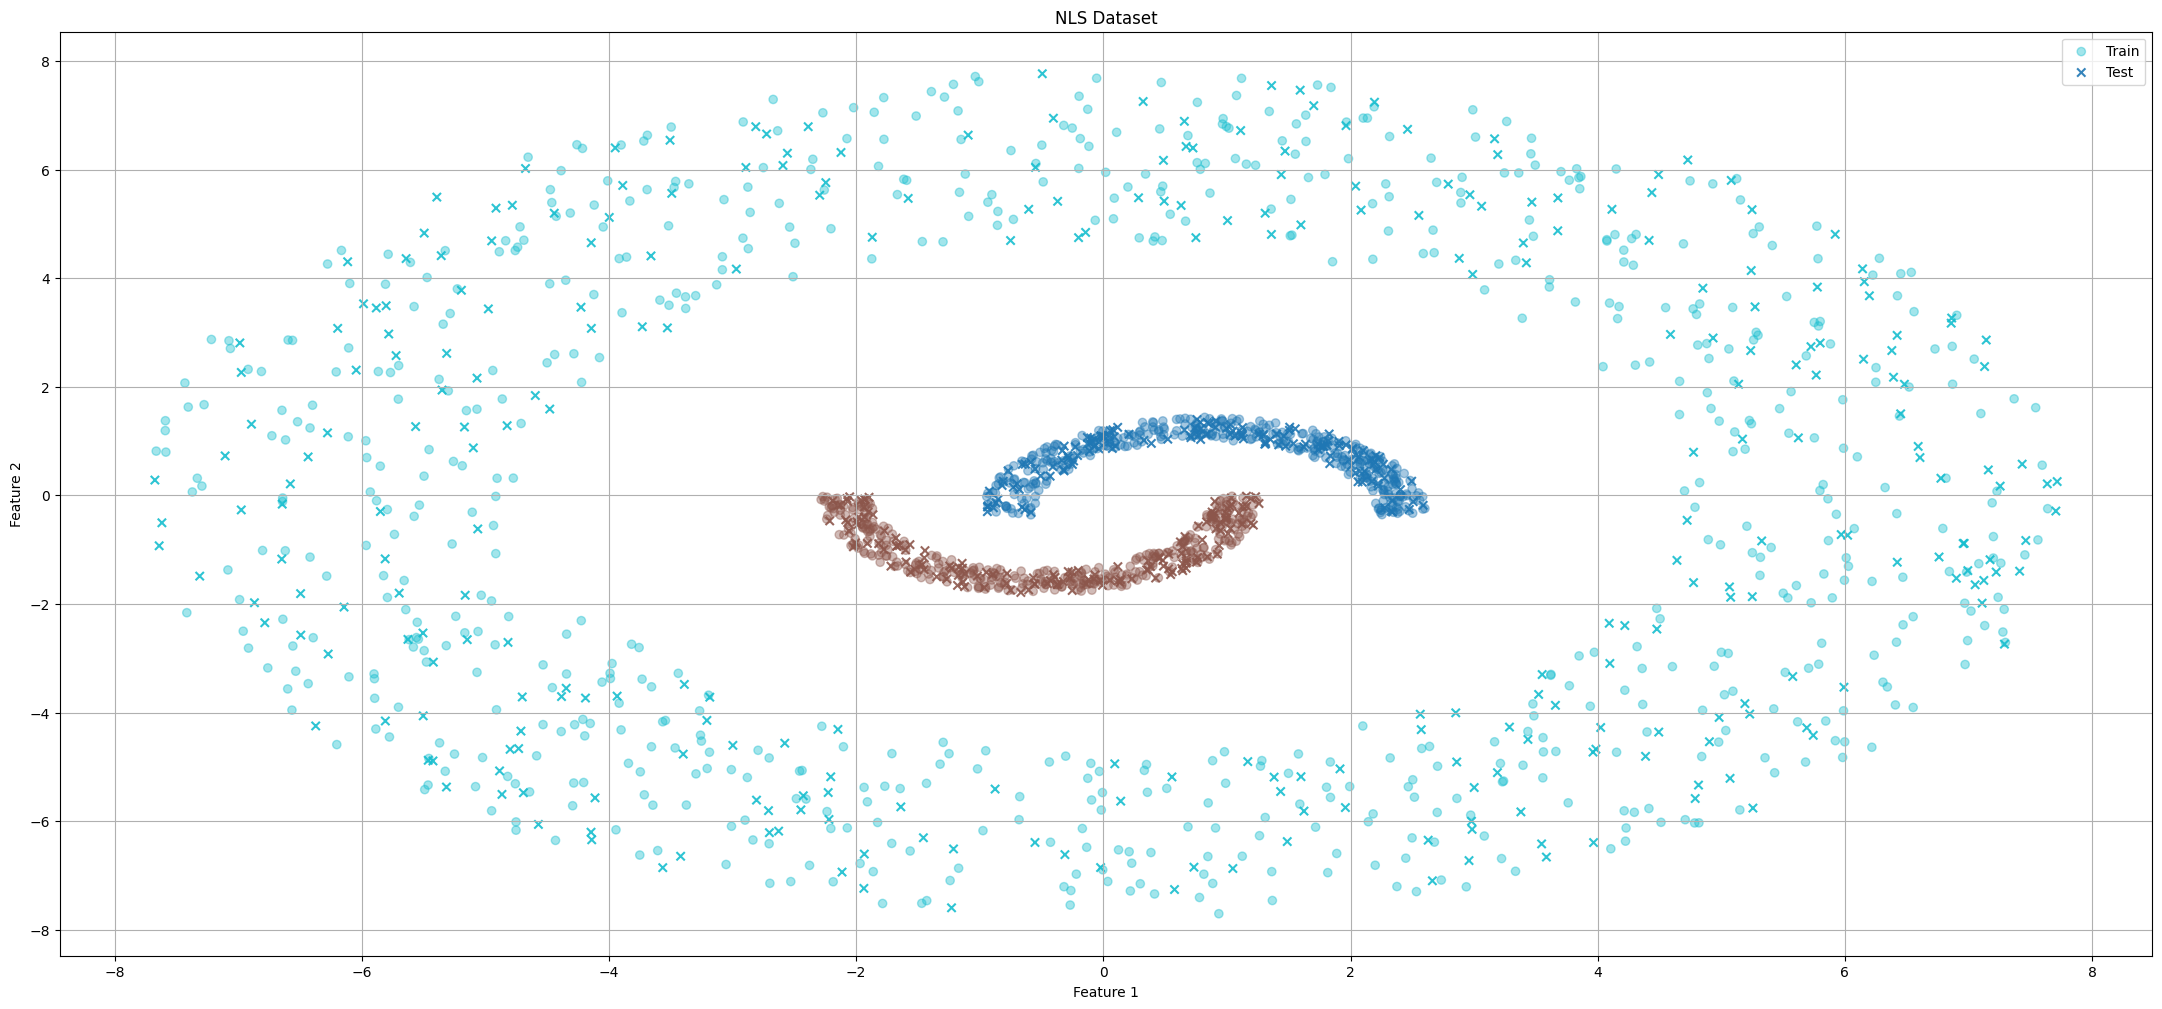

In [36]:

# Shuffle the dataset before splitting
np.random.seed(42)  # For reproducibility
np.random.shuffle(nls_data_labeled)

# Split into features (X) and labels (y)
nls_X = (nls_data_labeled[:, :2]) # First two columns (features)
nls_y = nls_data_labeled[:, 2]   # Third column (labels)

# Split into 70% train and 30% test
nls_X_train, nls_X_test, nls_y_train, nls_y_test = train_test_split(nls_X, nls_y, test_size=0.3, stratify=nls_y, random_state=42)

# Plot train and test data using plt.cm.tab10
plt.figure(figsize=(27, 12))
plt.scatter(nls_X_train[:, 0], nls_X_train[:, 1], c=nls_y_train, cmap='tab10', label="Train", marker="o", alpha=0.4)
plt.scatter(nls_X_test[:, 0], nls_X_test[:, 1], c=nls_y_test, cmap='tab10', label="Test", marker="x", alpha=0.9)

# Labels and title
plt.title("NLS Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [37]:
# unique_classes, counts = np.unique(nls_data_labeled[:, 2], return_counts=True)
# counts

In [38]:
y_nls_class1_train = [(el == 0) for el in y_nls_train]
y_nls_class1_test = [(el == 0) for el in y_nls_test]
model_nls_1 = Perceptron(input_size=X_nls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_1 = model_nls_1.train(X_nls_train, y_nls_class1_train)
y_nls_pred_1 = model_nls_1.predict(X_nls_test)
accuracy_nls = accuracy_score(y_nls_class1_test, y_nls_pred_1)
conf_matrix_nls_1 = confusion_matrix(y_nls_class1_test, y_nls_pred_1)
print("NLS Dataset Accuracy:", accuracy_nls)
print("NLS Confusion Matrix:\n", conf_matrix_nls_1)


NLS Dataset Accuracy: 0.6766666666666666
NLS Confusion Matrix:
 [[406   0]
 [194   0]]


In [39]:
# y_nls_class1_test

In [40]:
# y_nls_pred_1

In [41]:
y_nls_class2_train=[(el==1) for el in y_nls_train]
y_nls_class2_test=[(el==1) for el in y_nls_test]
model_nls_2 = Perceptron(input_size=X_nls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_2 = model_nls_2.train(X_nls_train, y_nls_class2_train)
y_nls_pred_2 = model_nls_2.predict(X_nls_test)
accuracy_nls = accuracy_score(y_nls_class2_test, y_nls_pred_2)
conf_matrix_nls_2 = confusion_matrix(y_nls_class2_test, y_nls_pred_2)
print("NLS Dataset Accuracy:", accuracy_nls)
print("NLS Confusion Matrix:\n", conf_matrix_nls_2)

NLS Dataset Accuracy: 0.9
NLS Confusion Matrix:
 [[540   0]
 [ 60   0]]


In [42]:
y_nls_class3_train=[(el==2) for el in y_nls_train]
y_nls_class3_test=[(el==2) for el in y_nls_test]
model_nls_3 = Perceptron(input_size=X_nls_train.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_3 = model_nls_3.train(X_nls_train, y_nls_class3_train)
y_nls_pred_3 = model_nls_3.predict(X_nls_test)
accuracy_nls = accuracy_score(y_nls_class3_test, y_nls_pred_3)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_3 = confusion_matrix(y_nls_class3_test, y_nls_pred_3)
print("NLS Confusion Matrix:\n", conf_matrix_nls_3)


NLS Dataset Accuracy: 0.97
NLS Confusion Matrix:
 [[582   0]
 [ 18   0]]


(1000, 2)
(1000,)


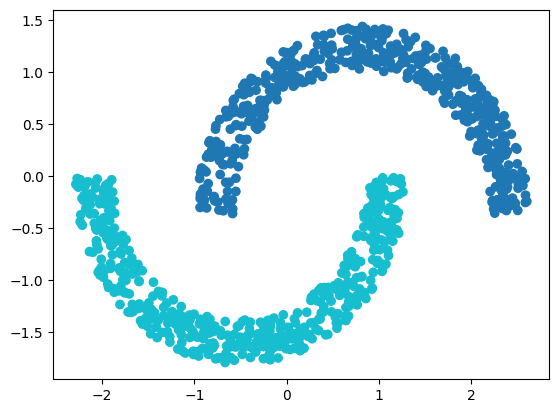

NLS Dataset Accuracy: 0.8933333333333333
NLS Confusion Matrix:
 [[134  16]
 [ 16 134]]


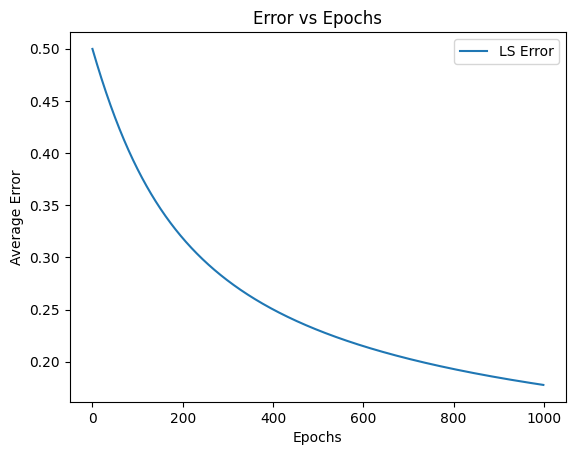

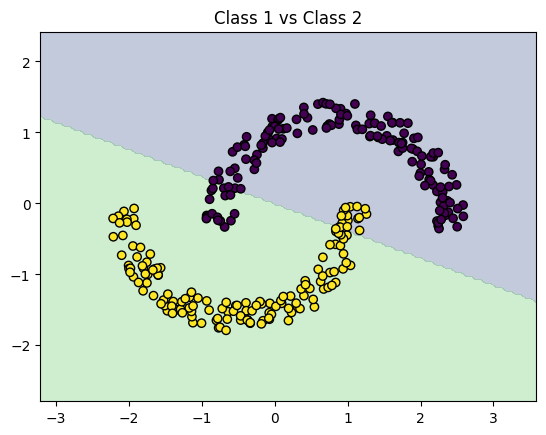

In [43]:
# Class 1 vs Class 2
nls_data_labeled_class_1_and_2 = np.vstack((nls_data_class_1, nls_data_class_2))
nls_X_1_vs_2 = nls_data_labeled_class_1_and_2[:, :2] # First two columns (features)
nls_y_1_vs_2 = nls_data_labeled_class_1_and_2[:, 2]   # Third column (labels)
print(nls_X_1_vs_2.shape)
print(nls_y_1_vs_2.shape)
plt.scatter(nls_data_labeled_class_1_and_2[:, 0], nls_data_labeled_class_1_and_2[:, 1], c=nls_data_labeled_class_1_and_2[:, 2], cmap='tab10')
plt.show()

nls_X_train_1_vs_2, nls_X_test_1_vs_2, nls_y_train_1_vs_2, nls_y_test_1_vs_2 = train_test_split(nls_X_1_vs_2, nls_y_1_vs_2, test_size=0.3, random_state=42)
model_nls_1_vs_2 = Perceptron(input_size=nls_X_train_1_vs_2.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_1_vs_2 = model_nls_1_vs_2.train(nls_X_train_1_vs_2, nls_y_train_1_vs_2)
y_nls_pred_1_vs_2 = model_nls_1_vs_2.predict(nls_X_test_1_vs_2)
accuracy_nls = accuracy_score(nls_y_test_1_vs_2, y_nls_pred_1_vs_2)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_1_vs_2 = confusion_matrix(nls_y_test_1_vs_2, y_nls_pred_1_vs_2)
print("NLS Confusion Matrix:\n", conf_matrix_nls_1_vs_2)
plt.plot(errors_nls_1_vs_2, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 1 vs Class 2")
plot_decision_boundary(model_nls_1_vs_2,nls_X_test_1_vs_2[:,:2],nls_y_test_1_vs_2)
plt.show()



(1500, 2)
(1500,)


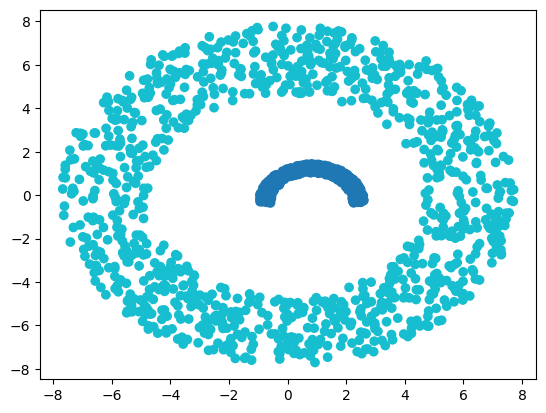

NLS Dataset Accuracy: 0.6711111111111111
NLS Confusion Matrix:
 [[  0 148]
 [  0 302]]


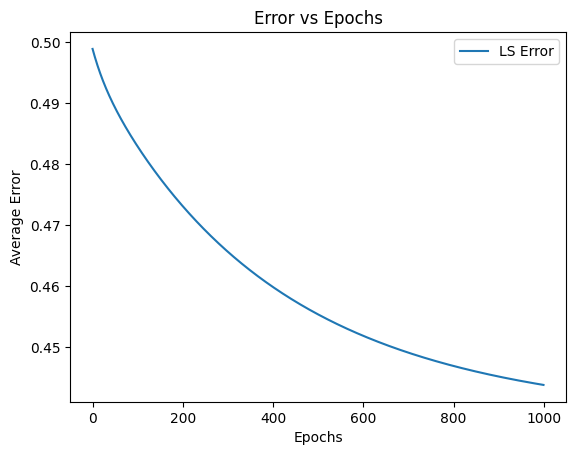

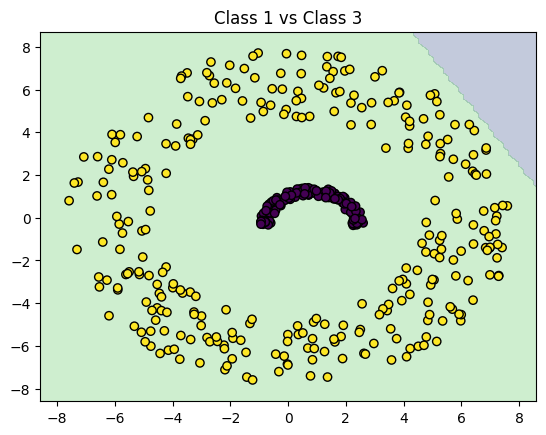

In [44]:
 # Class 1 vs Class 3
nls_data_class_3 = nls_data[1000:] ########################################################just giving class 3 label 1
labels_class_3 = np.full((1000, 1), 1)
nls_data_class_3 = np.hstack((nls_data_class_3, labels_class_3))
nls_data_labeled_class_1_and_3 = np.vstack((nls_data_class_1, nls_data_class_3))
nls_X_1_vs_3 = nls_data_labeled_class_1_and_3[:, :2]  # First two columns (features)
nls_y_1_vs_3 = nls_data_labeled_class_1_and_3[:, 2]   # Third column (labels)
print(nls_X_1_vs_3.shape)
print(nls_y_1_vs_3.shape)
plt.scatter(nls_data_labeled_class_1_and_3[:, 0], nls_data_labeled_class_1_and_3[:, 1], c=nls_data_labeled_class_1_and_3[:, 2], cmap='tab10')
plt.show()

nls_X_train_1_vs_3, nls_X_test_1_vs_3, nls_y_train_1_vs_3, nls_y_test_1_vs_3 = train_test_split(nls_X_1_vs_3, nls_y_1_vs_3, test_size=0.3, random_state=42)
model_nls_1_vs_3 = Perceptron(input_size=nls_X_train_1_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_1_vs_3 = model_nls_1_vs_3.train(nls_X_train_1_vs_3, nls_y_train_1_vs_3)
y_nls_pred_1_vs_3 = model_nls_1_vs_3.predict(nls_X_test_1_vs_3)
accuracy_nls = accuracy_score(nls_y_test_1_vs_3, y_nls_pred_1_vs_3)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_1_vs_3 = confusion_matrix(nls_y_test_1_vs_3, y_nls_pred_1_vs_3)
print("NLS Confusion Matrix:\n", conf_matrix_nls_1_vs_3)
plt.plot(errors_nls_1_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 1 vs Class 3")
plot_decision_boundary(model_nls_1_vs_3, nls_X_test_1_vs_3[:, :2], nls_y_test_1_vs_3)
plt.show()


(1500, 2)
(1500,)


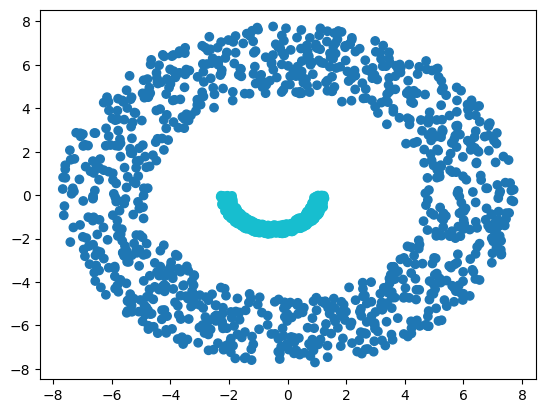

NLS Dataset Accuracy: 0.6711111111111111
NLS Confusion Matrix:
 [[302   0]
 [148   0]]


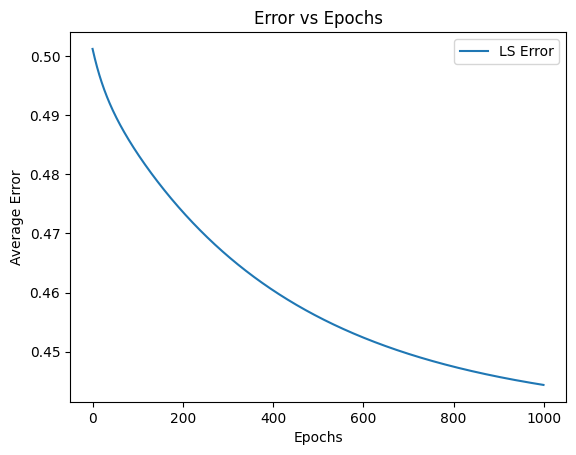

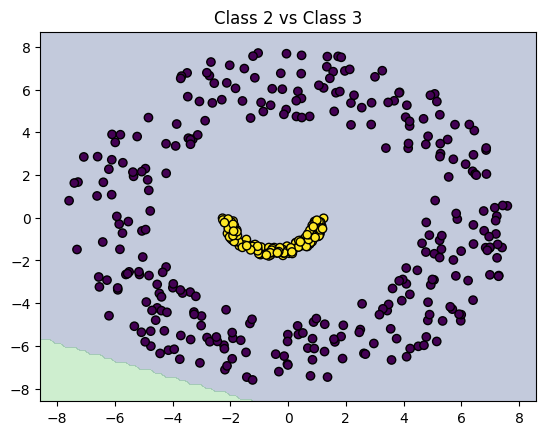

In [45]:
# Class 2 vs Class 3
nls_data_class_3 = nls_data[1000:] ########################################################just giving class 3 label 0
labels_class_3 = np.full((1000, 1), 0)
nls_data_class_3 = np.hstack((nls_data_class_3, labels_class_3))
nls_data_labeled_class_2_and_3 = np.vstack((nls_data_class_2, nls_data_class_3))
nls_X_2_vs_3 = nls_data_labeled_class_2_and_3[:, :2]  # First two columns (features)
nls_y_2_vs_3 = nls_data_labeled_class_2_and_3[:, 2]   # Third column (labels)
print(nls_X_2_vs_3.shape)
print(nls_y_2_vs_3.shape)
plt.scatter(nls_data_labeled_class_2_and_3[:, 0], nls_data_labeled_class_2_and_3[:, 1], c=nls_data_labeled_class_2_and_3[:, 2], cmap='tab10')
plt.show()

nls_X_train_2_vs_3, nls_X_test_2_vs_3, nls_y_train_2_vs_3, nls_y_test_2_vs_3 = train_test_split(nls_X_2_vs_3, nls_y_2_vs_3, test_size=0.3, random_state=42)
model_nls_2_vs_3 = Perceptron(input_size=nls_X_train_2_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_2_vs_3 = model_nls_2_vs_3.train(nls_X_train_2_vs_3, nls_y_train_2_vs_3)
y_nls_pred_2_vs_3 = model_nls_2_vs_3.predict(nls_X_test_2_vs_3)
accuracy_nls = accuracy_score(nls_y_test_2_vs_3, y_nls_pred_2_vs_3)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_2_vs_3 = confusion_matrix(nls_y_test_2_vs_3, y_nls_pred_2_vs_3)
print("NLS Confusion Matrix:\n", conf_matrix_nls_2_vs_3)
plt.plot(errors_nls_2_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 2 vs Class 3")
plot_decision_boundary(model_nls_2_vs_3, nls_X_test_2_vs_3[:, :2], nls_y_test_2_vs_3)
plt.show()


In [46]:
# prompt: nls_X_train_1_vs_2, nls_X_test_1_vs_2, nls_y_train_1_vs_2, nls_y_test_1_vs_2 = train_test_split(nls_X_1_vs_2,nls_y_1_vs_2,) fill it for 70 to 30 ratio



# Direct classification is a catastrope because data points with blue are sparsely distributed and are more in number hence without feature engineering these data points are not seperable

### We need to do this for outer part i.e. class 3 vs others and preprocessing data by taking square of each co-ordinate


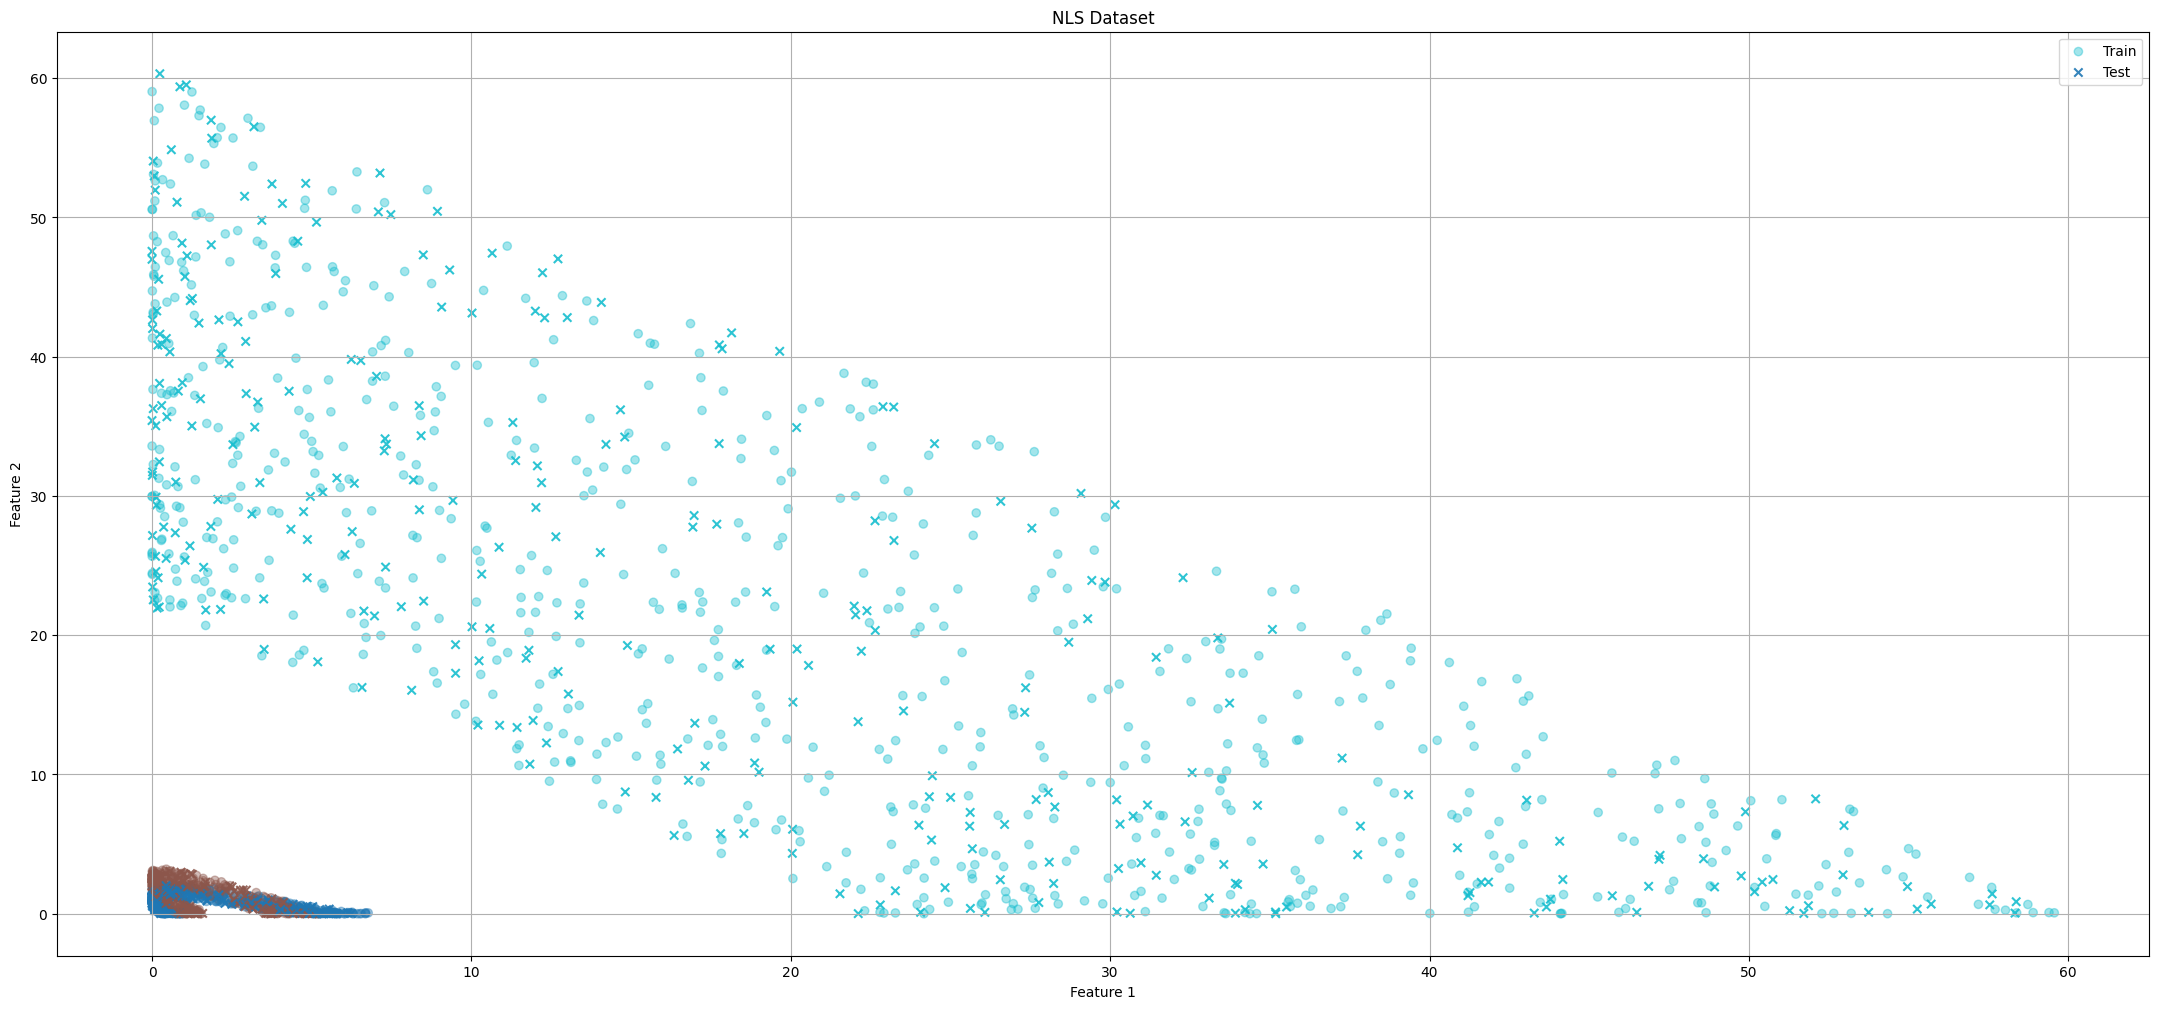

In [47]:

# Shuffle the dataset before splitting
np.random.seed(42)  # For reproducibility
np.random.shuffle(nls_data_labeled)

# Split into features (X) and labels (y)
nls_X = (nls_data_labeled[:, :2])**2 # First two columns (features) #########################taking square for each co ordinate
nls_y = nls_data_labeled[:, 2]   # Third column (labels)

# Split into 70% train and 30% test
nls_X_train, nls_X_test, nls_y_train, nls_y_test = train_test_split(nls_X, nls_y, test_size=0.3, stratify=nls_y, random_state=42)

# Plot train and test data using plt.cm.tab10
plt.figure(figsize=(27, 12))
plt.scatter(nls_X_train[:, 0], nls_X_train[:, 1], c=nls_y_train, cmap='tab10', label="Train", marker="o", alpha=0.4)
plt.scatter(nls_X_test[:, 0], nls_X_test[:, 1], c=nls_y_test, cmap='tab10', label="Test", marker="x", alpha=0.9)

# Labels and title
plt.title("NLS Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


(1500, 2)
(1500,)


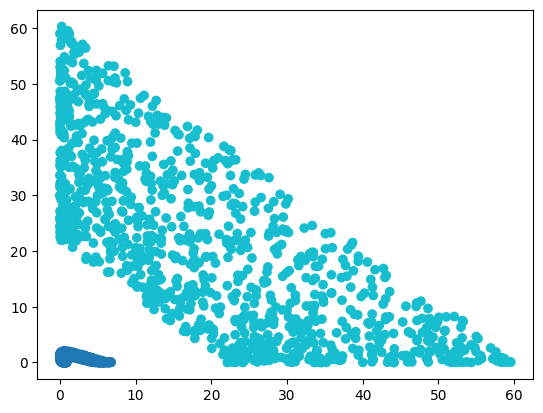

NLS Dataset Accuracy: 1.0
NLS Confusion Matrix:
 [[148   0]
 [  0 302]]


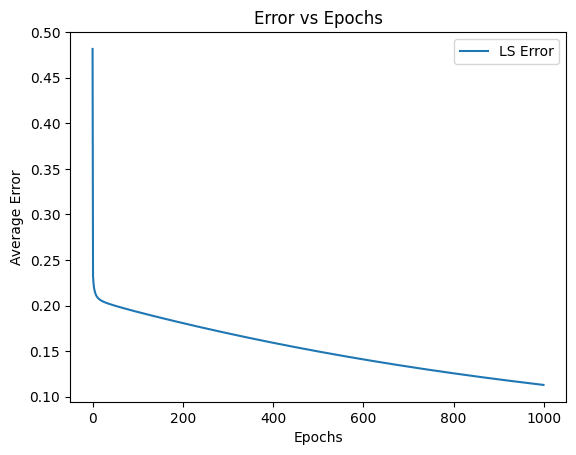

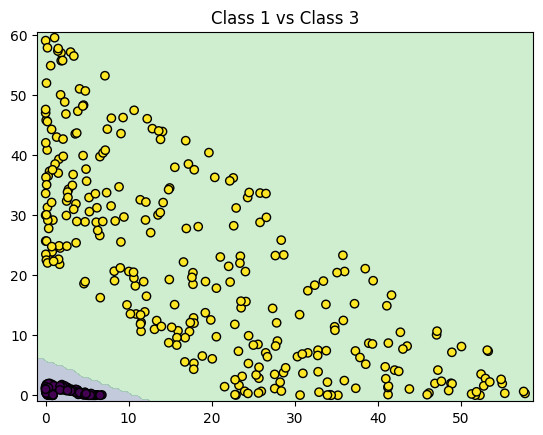

In [48]:
# class 1 vs 3 after taking square of co-ordinates
 # Class 1 vs Class 3
nls_data_class_3 = nls_data[1000:] ########################################################just giving class 3 label 1
labels_class_3 = np.full((1000, 1), 1)
nls_data_class_3 = np.hstack((nls_data_class_3, labels_class_3))
nls_data_labeled_class_1_and_3 = np.vstack((nls_data_class_1, nls_data_class_3))
nls_X_1_vs_3 = nls_data_labeled_class_1_and_3[:, :2]**2  # First two columns (features)##############taking square of each co-ordinate
nls_y_1_vs_3 = nls_data_labeled_class_1_and_3[:, 2]   # Third column (labels)
print(nls_X_1_vs_3.shape)
print(nls_y_1_vs_3.shape)
plt.scatter(nls_data_labeled_class_1_and_3[:, 0]**2, nls_data_labeled_class_1_and_3[:, 1]**2, c=nls_data_labeled_class_1_and_3[:, 2], cmap='tab10')
plt.show()

nls_X_train_1_vs_3, nls_X_test_1_vs_3, nls_y_train_1_vs_3, nls_y_test_1_vs_3 = train_test_split(nls_X_1_vs_3, nls_y_1_vs_3, test_size=0.3, random_state=42)
model_nls_1_vs_3 = Perceptron(input_size=nls_X_train_1_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_1_vs_3 = model_nls_1_vs_3.train(nls_X_train_1_vs_3, nls_y_train_1_vs_3)
y_nls_pred_1_vs_3 = model_nls_1_vs_3.predict(nls_X_test_1_vs_3)
accuracy_nls = accuracy_score(nls_y_test_1_vs_3, y_nls_pred_1_vs_3)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_1_vs_3 = confusion_matrix(nls_y_test_1_vs_3, y_nls_pred_1_vs_3)
print("NLS Confusion Matrix:\n", conf_matrix_nls_1_vs_3)
plt.plot(errors_nls_1_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 1 vs Class 3")
plot_decision_boundary(model_nls_1_vs_3, nls_X_test_1_vs_3[:, :2], nls_y_test_1_vs_3)
plt.show()



(1500, 2)
(1500,)


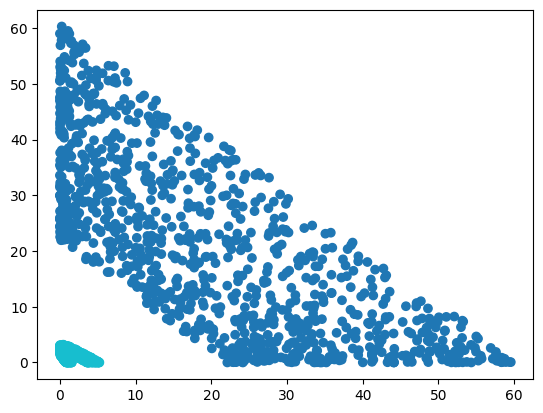

NLS Dataset Accuracy: 1.0
NLS Confusion Matrix:
 [[302   0]
 [  0 148]]


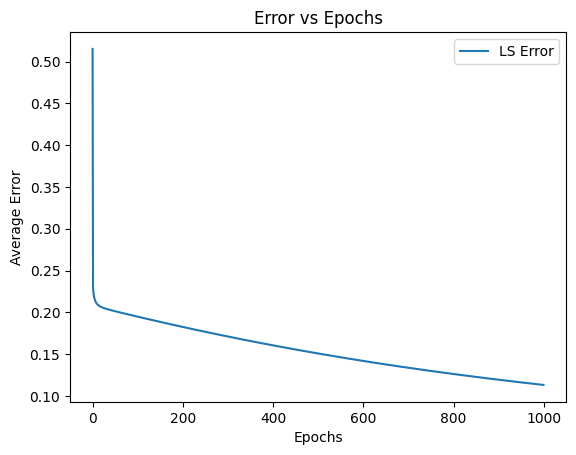

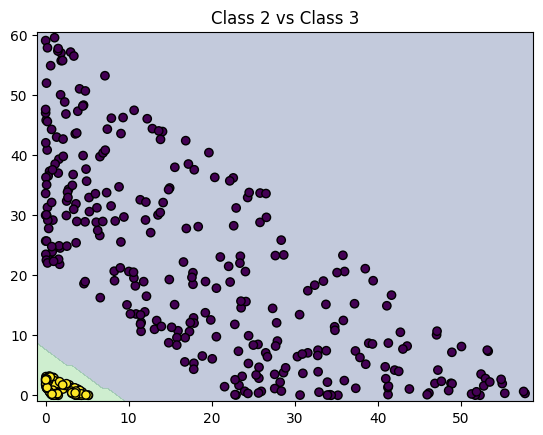

In [49]:
# class2 vs class 3 after taking square of each number
nls_data_class_3 = nls_data[1000:] ########################################################just giving class 3 label 0
labels_class_3 = np.full((1000, 1), 0)
nls_data_class_3 = np.hstack((nls_data_class_3, labels_class_3))
nls_data_labeled_class_2_and_3 = np.vstack((nls_data_class_2, nls_data_class_3))
nls_X_2_vs_3 = nls_data_labeled_class_2_and_3[:, :2]**2  # First two columns (features)#############squaring the co-ordinates
nls_y_2_vs_3 = nls_data_labeled_class_2_and_3[:, 2]   # Third column (labels)
print(nls_X_2_vs_3.shape)
print(nls_y_2_vs_3.shape)
plt.scatter(nls_data_labeled_class_2_and_3[:, 0]**2, nls_data_labeled_class_2_and_3[:, 1]**2, c=nls_data_labeled_class_2_and_3[:, 2], cmap='tab10')
plt.show()

nls_X_train_2_vs_3, nls_X_test_2_vs_3, nls_y_train_2_vs_3, nls_y_test_2_vs_3 = train_test_split(nls_X_2_vs_3, nls_y_2_vs_3, test_size=0.3, random_state=42)
model_nls_2_vs_3 = Perceptron(input_size=nls_X_train_2_vs_3.shape[1], activation='sigmoid', lr=0.01, epochs=1000)
errors_nls_2_vs_3 = model_nls_2_vs_3.train(nls_X_train_2_vs_3, nls_y_train_2_vs_3)
y_nls_pred_2_vs_3 = model_nls_2_vs_3.predict(nls_X_test_2_vs_3)
accuracy_nls = accuracy_score(nls_y_test_2_vs_3, y_nls_pred_2_vs_3)
print("NLS Dataset Accuracy:", accuracy_nls)
conf_matrix_nls_2_vs_3 = confusion_matrix(nls_y_test_2_vs_3, y_nls_pred_2_vs_3)
print("NLS Confusion Matrix:\n", conf_matrix_nls_2_vs_3)
plt.plot(errors_nls_2_vs_3, label='LS Error')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()
plt.title("Class 2 vs Class 3")
plot_decision_boundary(model_nls_2_vs_3, nls_X_test_2_vs_3[:, :2], nls_y_test_2_vs_3)
plt.show()

